# Cienciade Datos: Uso del teléfono en Adolescentes

In [88]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from src.functions import plot_matriz_dispersion


In [89]:
# Cargar el archivo CSV
df = pd.read_csv("../data/data.csv")


In [90]:
df.info()

# Limpiar identificadores
df.drop(columns=['ID', 'Name'], inplace=True)
df.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      3000 non-null   int64  
 1   Name                    3000 non-null   object 
 2   Age                     3000 non-null   int64  
 3   Gender                  3000 non-null   object 
 4   Location                3000 non-null   object 
 5   School_Grade            3000 non-null   object 
 6   Daily_Usage_Hours       3000 non-null   float64
 7   Sleep_Hours             3000 non-null   float64
 8   Academic_Performance    3000 non-null   int64  
 9   Social_Interactions     3000 non-null   int64  
 10  Exercise_Hours          3000 non-null   float64
 11  Anxiety_Level           3000 non-null   int64  
 12  Depression_Level        3000 non-null   int64  
 13  Self_Esteem             3000 non-null   int64  
 14  Parental_Control        3000 non-null   

,Age,Gender,Location,School_Grade,Daily_Usage_Hours,Sleep_Hours,Academic_Performance,Social_Interactions,Exercise_Hours,Anxiety_Level,...,Screen_Time_Before_Bed,Phone_Checks_Per_Day,Apps_Used_Daily,Time_on_Social_Media,Time_on_Gaming,Time_on_Education,Phone_Usage_Purpose,Family_Communication,Weekend_Usage_Hours,Addiction_Level
count,3000.000000,3000,3000,3000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,...,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000,3000.000000,3000.000000,3000.000000
unique,NaN,3,2726,6,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN
top,NaN,Male,North Michael,12th,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Browsing,NaN,NaN,NaN
freq,NaN,1016,6,529,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,627,NaN,NaN,NaN
mean,15.969667,NaN,NaN,NaN,5.020667,6.489767,74.947333,5.097667,1.040667,5.590000,...,1.006733,83.093000,12.609333,2.499233,1.525267,1.016333,NaN,5.459667,6.015100,8.881900
std,1.989489,NaN,NaN,NaN,1.956501,1.490713,14.684156,3.139333,0.734620,2.890678,...,0.492878,37.747044,4.611486,0.988201,0.932701,0.648341,NaN,2.864572,2.014776,1.609598
min,13.000000,NaN,NaN,NaN,0.000000,3.000000,50.000000,0.000000,0.000000,1.000000,...,0.000000,20.000000,5.000000,0.000000,0.000000,0.000000,NaN,1.000000,0.000000,1.000000
25%,14.000000,NaN,NaN,NaN,3.700000,5.500000,62.000000,2.000000,0.500000,3.000000,...,0.700000,51.000000,9.000000,1.800000,0.800000,0.500000,NaN,3.000000,4.700000,8.000000
50%,16.000000,NaN,NaN,NaN,5.000000,6.500000,75.000000,5.000000,1.000000,6.000000,...,1.000000,82.000000,13.000000,2.500000,1.500000,1.000000,NaN,5.000000,6.000000,10.000000
75%,18.000000,NaN,NaN,NaN,6.400000,7.500000,88.000000,8.000000,1.500000,8.000000,...,1.400000,115.250000,17.000000,3.200000,2.200000,1.500000,NaN,8.000000,7.400000,10.000000


In [91]:
#valores duplicados
df.duplicated().sum()

np.int64(0)

In [92]:
#valores nulos
df.isna().sum()


Age                       0
Gender                    0
Location                  0
School_Grade              0
Daily_Usage_Hours         0
Sleep_Hours               0
Academic_Performance      0
Social_Interactions       0
Exercise_Hours            0
Anxiety_Level             0
Depression_Level          0
Self_Esteem               0
Parental_Control          0
Screen_Time_Before_Bed    0
Phone_Checks_Per_Day      0
Apps_Used_Daily           0
Time_on_Social_Media      0
Time_on_Gaming            0
Time_on_Education         0
Phone_Usage_Purpose       0
Family_Communication      0
Weekend_Usage_Hours       0
Addiction_Level           0
dtype: int64

In [93]:
#descripcion de valores
df.describe(include='all')

,Age,Gender,Location,School_Grade,Daily_Usage_Hours,Sleep_Hours,Academic_Performance,Social_Interactions,Exercise_Hours,Anxiety_Level,...,Screen_Time_Before_Bed,Phone_Checks_Per_Day,Apps_Used_Daily,Time_on_Social_Media,Time_on_Gaming,Time_on_Education,Phone_Usage_Purpose,Family_Communication,Weekend_Usage_Hours,Addiction_Level
count,3000.000000,3000,3000,3000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,...,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000,3000.000000,3000.000000,3000.000000
unique,NaN,3,2726,6,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN
top,NaN,Male,North Michael,12th,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Browsing,NaN,NaN,NaN
freq,NaN,1016,6,529,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,627,NaN,NaN,NaN
mean,15.969667,NaN,NaN,NaN,5.020667,6.489767,74.947333,5.097667,1.040667,5.590000,...,1.006733,83.093000,12.609333,2.499233,1.525267,1.016333,NaN,5.459667,6.015100,8.881900
std,1.989489,NaN,NaN,NaN,1.956501,1.490713,14.684156,3.139333,0.734620,2.890678,...,0.492878,37.747044,4.611486,0.988201,0.932701,0.648341,NaN,2.864572,2.014776,1.609598
min,13.000000,NaN,NaN,NaN,0.000000,3.000000,50.000000,0.000000,0.000000,1.000000,...,0.000000,20.000000,5.000000,0.000000,0.000000,0.000000,NaN,1.000000,0.000000,1.000000
25%,14.000000,NaN,NaN,NaN,3.700000,5.500000,62.000000,2.000000,0.500000,3.000000,...,0.700000,51.000000,9.000000,1.800000,0.800000,0.500000,NaN,3.000000,4.700000,8.000000
50%,16.000000,NaN,NaN,NaN,5.000000,6.500000,75.000000,5.000000,1.000000,6.000000,...,1.000000,82.000000,13.000000,2.500000,1.500000,1.000000,NaN,5.000000,6.000000,10.000000
75%,18.000000,NaN,NaN,NaN,6.400000,7.500000,88.000000,8.000000,1.500000,8.000000,...,1.400000,115.250000,17.000000,3.200000,2.200000,1.500000,NaN,8.000000,7.400000,10.000000


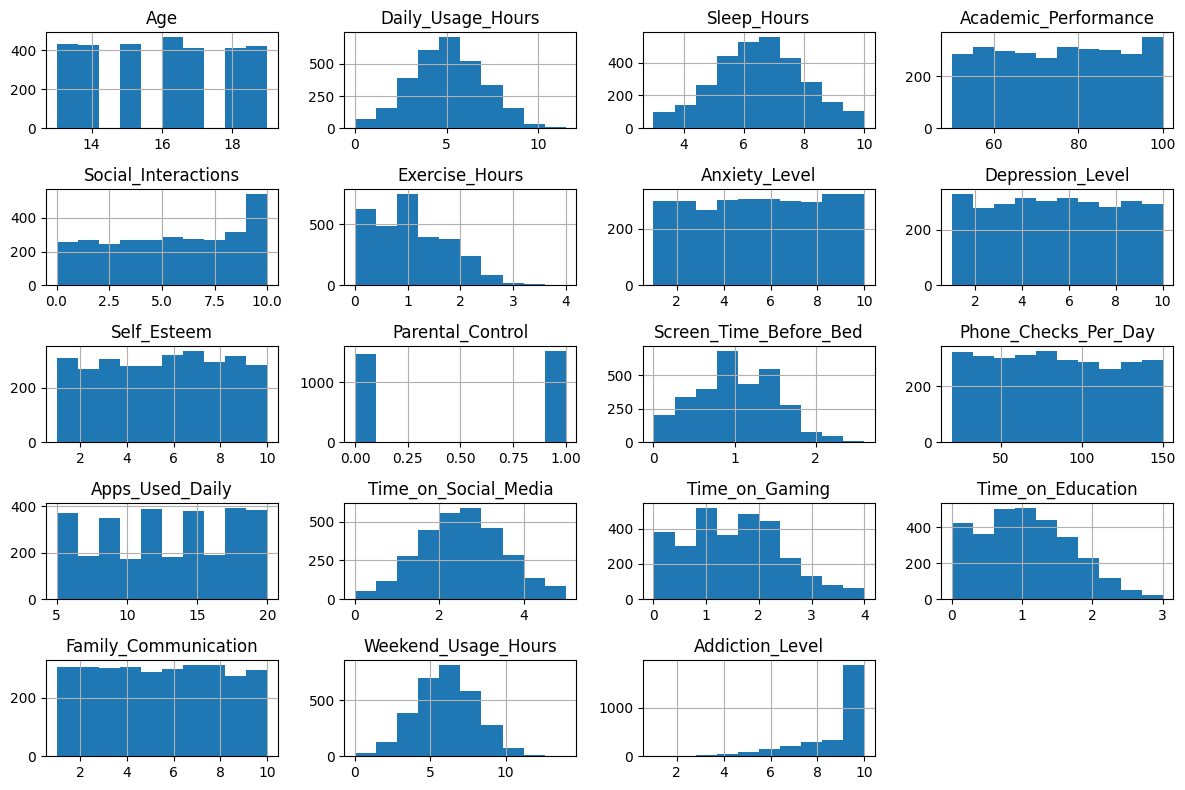

In [94]:
#histogramas
df.hist(figsize=(12, 8))
plt.tight_layout()
plt.show()

In [95]:
# Crear variable binaria de adicción (1 = alto, 0 = bajo)
df["AddiccionBinaria"] = (df["Addiction_Level"] > 5).astype(int)

# 3. Variables predictoras y objetivo
X = df[["Daily_Usage_Hours"]]     # Horas de uso
y = df["AddiccionBinaria"]        # Etiqueta

# 4. Separar datos entrenamiento/prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# 5. Modelo
model = LogisticRegression()
model.fit(X_train, y_train)

# 6. Predicciones
y_pred = model.predict(X_test)

# 7. Resultados
print("MATRIZ DE CONFUSIÓN")
print(confusion_matrix(y_test, y_pred))




MATRIZ DE CONFUSIÓN
[[  3  25]
 [  8 864]]


In [96]:
print("\nREPORTE DE CLASIFICACIÓN")
print(classification_report(y_test, y_pred))




REPORTE DE CLASIFICACIÓN
              precision    recall  f1-score   support

           0       0.27      0.11      0.15        28
           1       0.97      0.99      0.98       872

    accuracy                           0.96       900
   macro avg       0.62      0.55      0.57       900
weighted avg       0.95      0.96      0.96       900



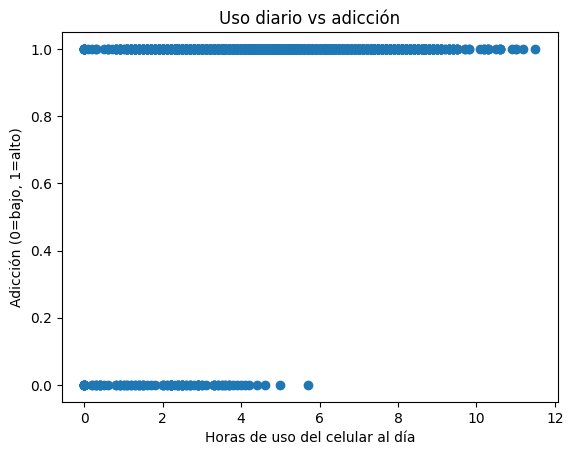

In [97]:

# 8. Grafico simple
plt.scatter(df["Daily_Usage_Hours"], df["AddiccionBinaria"])
plt.xlabel("Horas de uso del celular al día")
plt.ylabel("Adicción (0=bajo, 1=alto)")
plt.title("Uso diario vs adicción")
plt.show()

In [98]:
y_prob = model.predict_proba(X_test)[:, 1]
df_pred = pd.DataFrame({"Horas": X_test["Daily_Usage_Hours"], "Probabilidad": y_prob})
print(df_pred.head())


      Horas  Probabilidad
1801    5.6      0.996424
1190    5.1      0.993852
1817    8.0      0.999737
251     3.0      0.942619
2505    4.5      0.988251


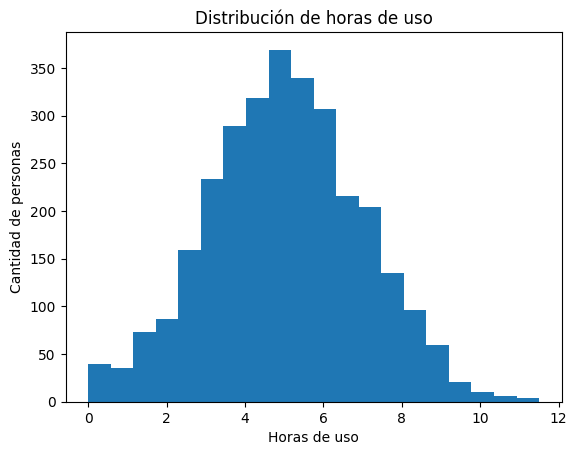

In [99]:
plt.hist(df["Daily_Usage_Hours"], bins=20)
plt.xlabel("Horas de uso")
plt.ylabel("Cantidad de personas")
plt.title("Distribución de horas de uso")
plt.show()



## Matriz de gráficos de dispersión respecto al nivel de adicción

In [101]:
plot_matriz_dispersion(df)

NameError: name 'math' is not defined